In [1]:
import torch
from utils import Args
from train import Training

# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [16, 64, 128, 256]
B = [20, 64, 128, 256]
L = [4, 12, 18, 24]
h = [2, 4, 8]
d = [32, 128, 256, 768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1, 10, 20, 30]

args = Args(datasets_paths = ["./datasets/shakespear_corpus.txt"])
out_dir = './runs/'
N = [16, 64, 128, 256]
B = [20, 64, 128, 256]
L = [4, 12, 18, 24]
h = [4, 8, 12, 16]
d = [32, 128, 256, 768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1, 10, 20, 30]

args = Args(
    N[0],B[0],L[0],h[0],d[0],
    use_lr_decay[0],learning_rate[0],
    datasets_paths[0],max_iterations[0],
    out_dir=out_dir, val_int=30, cross_val=True)

Args(batch_size=16, n_tokens=20, n_layers=4, n_heads=4, d_model=32, use_lr_decay=True, lr=0.0001, dataset_path='./datasets/shakespear_corpus.txt', max_iter=100, out_dir='./runs/', n_warm_iters=100, lr_decay_iter=5000, min_lr=0.0001, n_validation_batch=200, betas=(0.9, 0.99), n_epochs=10, val_int=30, save=True, save_int=200, name='milkshake', cross_val=True, k_fold=10)


#### Train models

In [ ]:
training = Training(args)
model, losses = training.train_model()
print(losses.keys())
print(losses['validation'])

#### Cross validation

In [3]:
training_cross = Training(args)
models, train_loss, val_loss = training_cross.cross_validation()

---------------------------------
Fold n°0
train indices: [0,0),[111538,1115381), test indices: [0,111538)
train indices: [0,0),[111538,1115381), test indices: [0,111538)
Epoch: 0, Batch index 0, Training Loss: 4.3832, Validation Loss: 4.4431
Epoch: 0, Batch index 30, Training Loss: 4.4017, Validation Loss: 4.3933
Epoch: 0, Batch index 60, Training Loss: 4.2663, Validation Loss: 4.2646
Epoch: 0, Batch index 90, Training Loss: 4.0933, Validation Loss: 4.0697
---------------------------------
Fold n°1
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
Epoch: 0, Batch index 0, Training Loss: 4.3724, Validation Loss: 4.3659
Epoch: 0, Batch index 30, Training Loss: 4.3072, Validation Loss: 4.3190
Epoch: 0, Batch index 60, Training Loss: 4.1969, Validation Loss: 4.2030
Epoch: 0, Batch index 90, Training Loss: 4.0532, Validation Loss: 4.0160
---------------------------------
Fold n°2
train indices

#### Results

In [ ]:
print(train_loss.size()) # 5 folds, 100 grad updates e.g. 5 x 100 matrix.
print(val_loss.size())   # 5 folds, log every 100 grad updates e.g. 5 x 1 matrix
print(val_loss)

In [ ]:
training_cross.losses_graph()

In [ ]:
training_cross.perplexity_graph()

### Loading from previous validation run

In [17]:
import os
import torch
import argparse
import numpy as np
from torch import Tensor
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data.dataloader import DataLoader
from utils import  stringify_hyparams

dict_keys(['k_fold_train_loss', 'k_fold_valid_loss', 'params'])
torch.Size([5, 101])


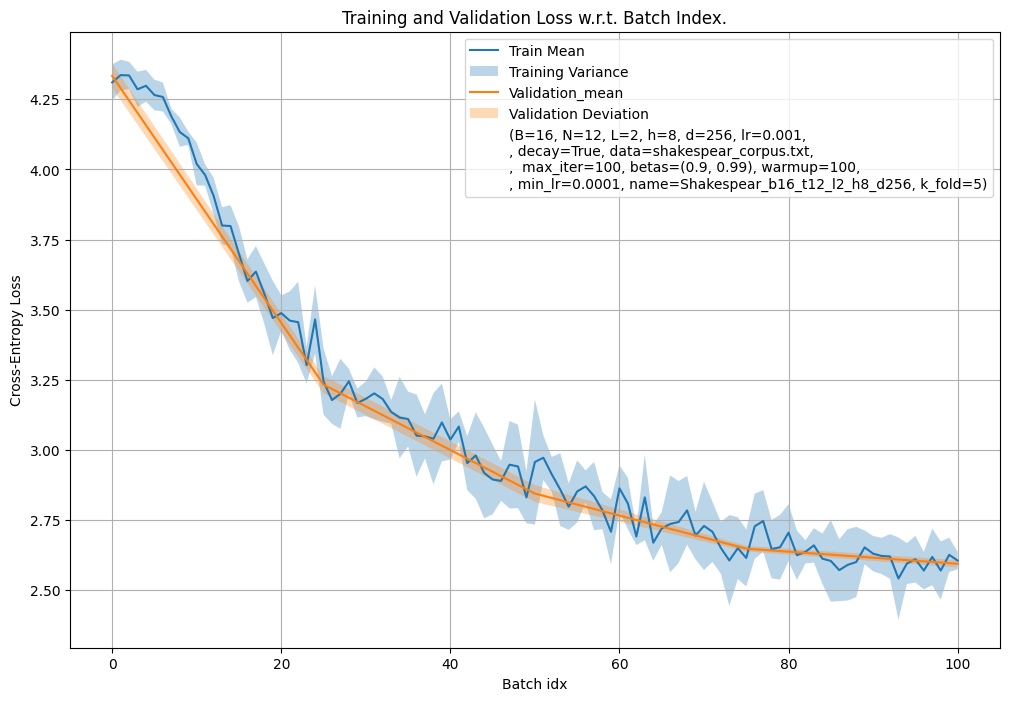

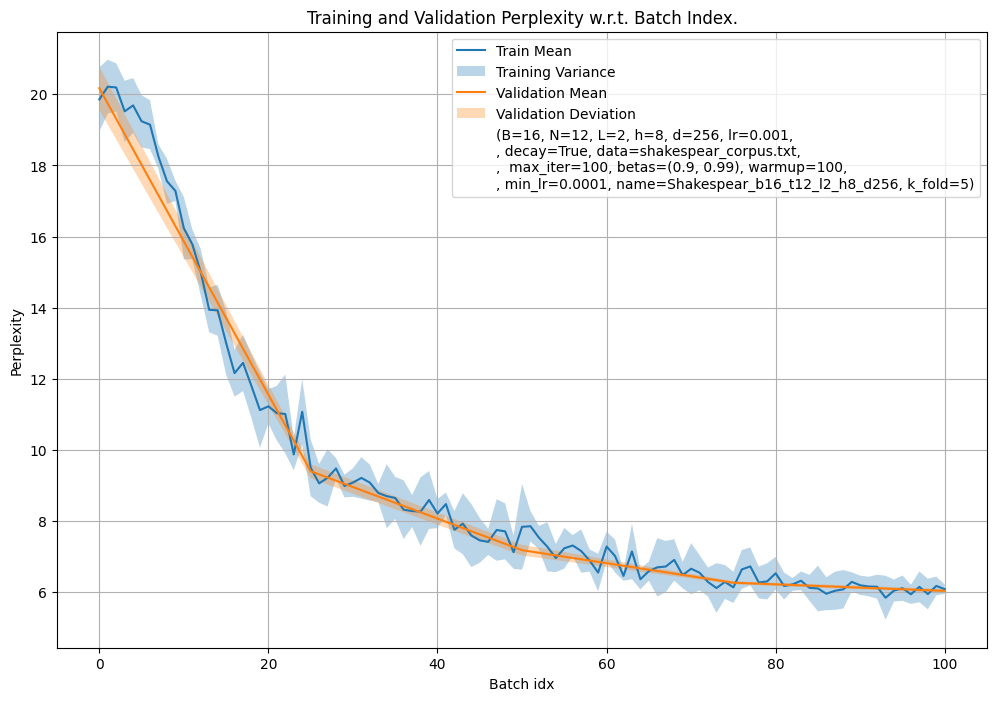

In [20]:
import torch
from utils import cv_losses_graph, perplexity_graph

path = './runs/Shakespear_b16_t12_l2_h8_d256'
cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
print(cross_val_run.keys())
print(cross_val_run['k_fold_train_loss'].size())
cv_losses_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], path, # save graph to same folder
    True, "chill_model", cross_val_run['params']          
)

perplexity_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], path, # save graph to same folder
    True, "chill_model", cross_val_run['params']          
)


In [21]:
from utils import stringify_hyparams

print(stringify_hyparams(cross_val_run['params']))

(B=16, N=12, L=2, h=8, d=256, lr=0.001, 
, decay=True, data=shakespear_corpus.txt, 
,  max_iter=100, betas=(0.9, 0.99), warmup=100, 
, min_lr=0.0001, name=Shakespear_b16_t12_l2_h8_d256, k_fold=5)


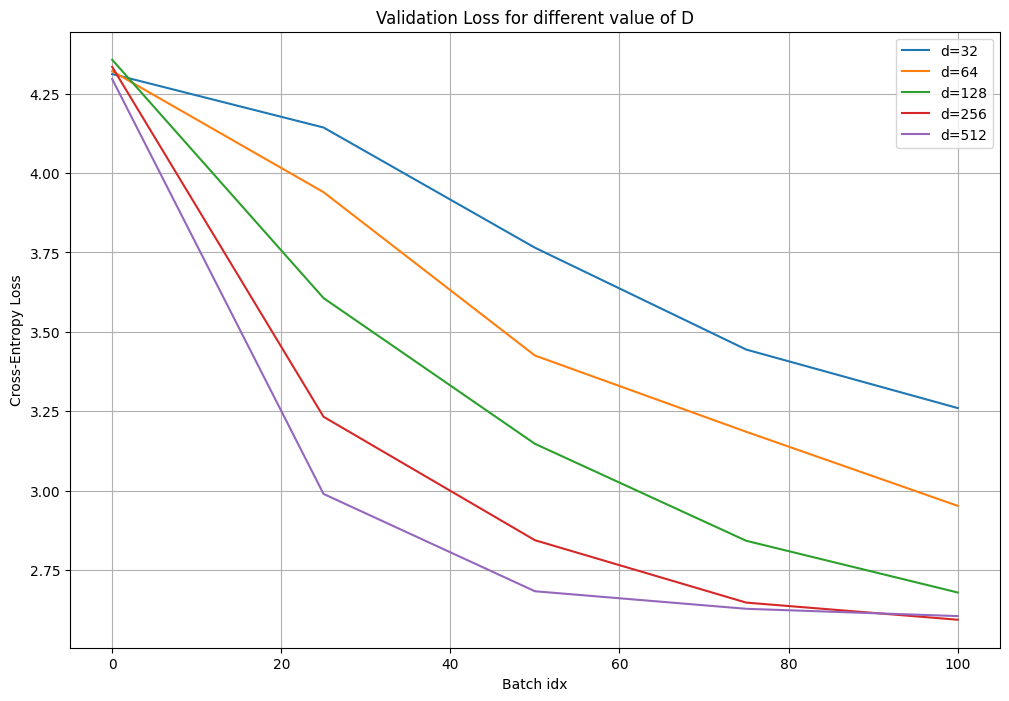

In [31]:
paths = ['./runs/Shakespear_b16_t12_l2_h8_d32', './runs/Shakespear_b16_t12_l2_h8_d64','./runs/Shakespear_b16_t12_l2_h8_d128','./runs/Shakespear_b16_t12_l2_h8_d256','./runs/Shakespear_b16_t12_l2_h8_d512']

"""
    Plot cross-validation train/validation losses w.r.t batch index.
    Plots variance areas over folds. 
    """
plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"d={cross_val_run['params']['d_model']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different value of D')
plt.legend(loc = 'upper right')

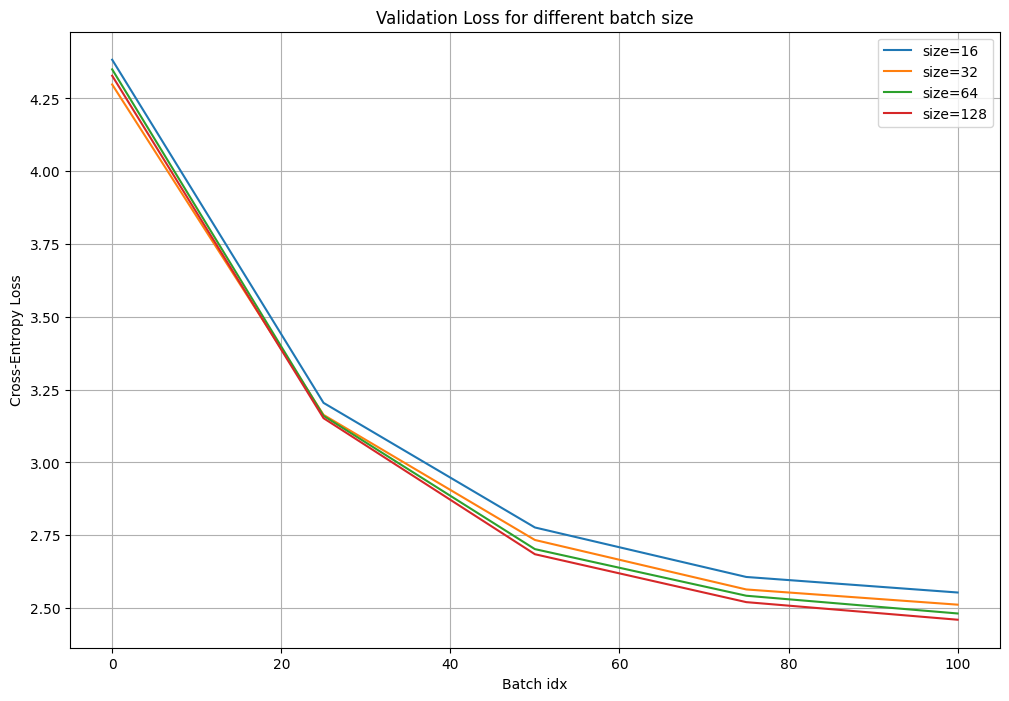

In [35]:
paths = ['./runs/Batch_b16_t32_l2_h4_d256','./runs/Batch_b32_t32_l2_h4_d256','./runs/Batch_b64_t32_l2_h4_d256','./runs/Batch_b128_t32_l2_h4_d256']

"""
    Plot cross-validation train/validation losses w.r.t batch index.
    Plots variance areas over folds. 
    """
plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"size={cross_val_run['params']['batch_size']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different batch size')
plt.legend(loc = 'upper right')

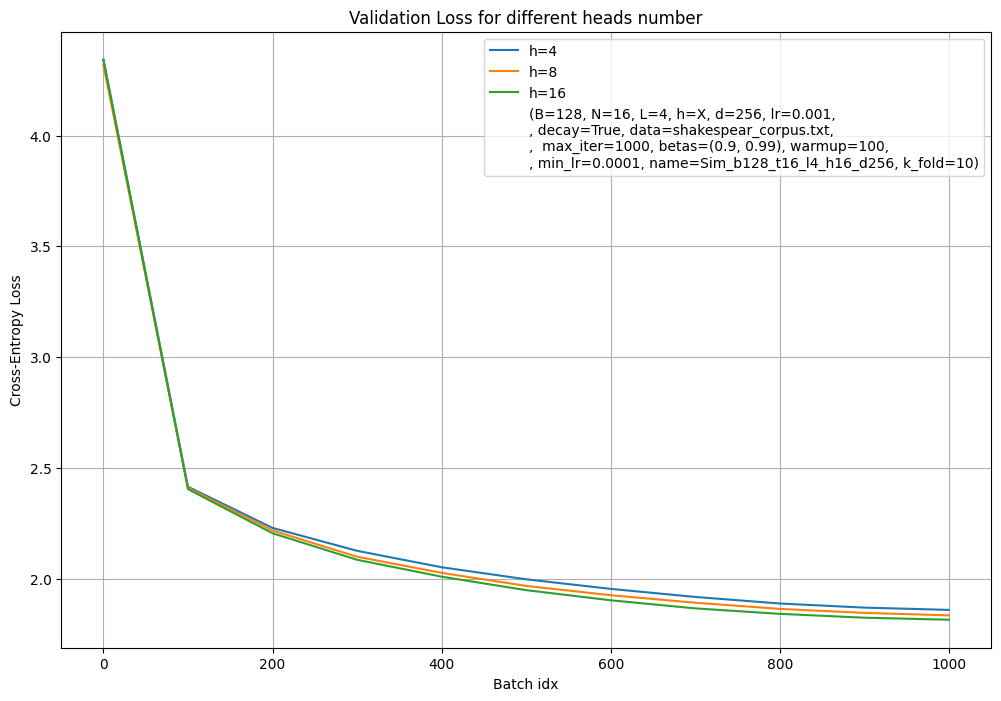

In [39]:
paths = ['./runs/results/Sim_b128_t16_l4_h4_d256',
         './runs/results/Sim_b128_t16_l4_h8_d256',
         './runs/results/Sim_b128_t16_l4_h16_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'
plt.scatter([], [], color="w", alpha=0, label=stringify_hyparams(args))
plt.legend(loc = 'upper right')

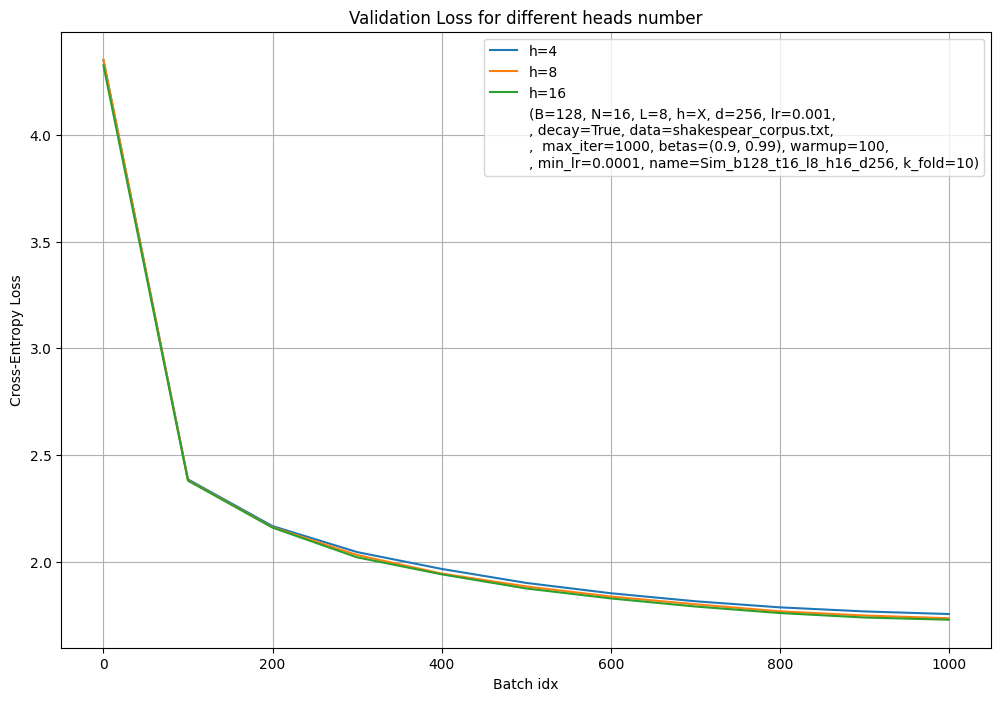

In [40]:
paths = ['./runs/results/Sim_b128_t16_l8_h4_d256',
         './runs/results/Sim_b128_t16_l8_h8_d256',
         './runs/results/Sim_b128_t16_l8_h16_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'
plt.scatter([], [], color="w", alpha=0, label=stringify_hyparams(args))

plt.legend(loc = 'upper right')

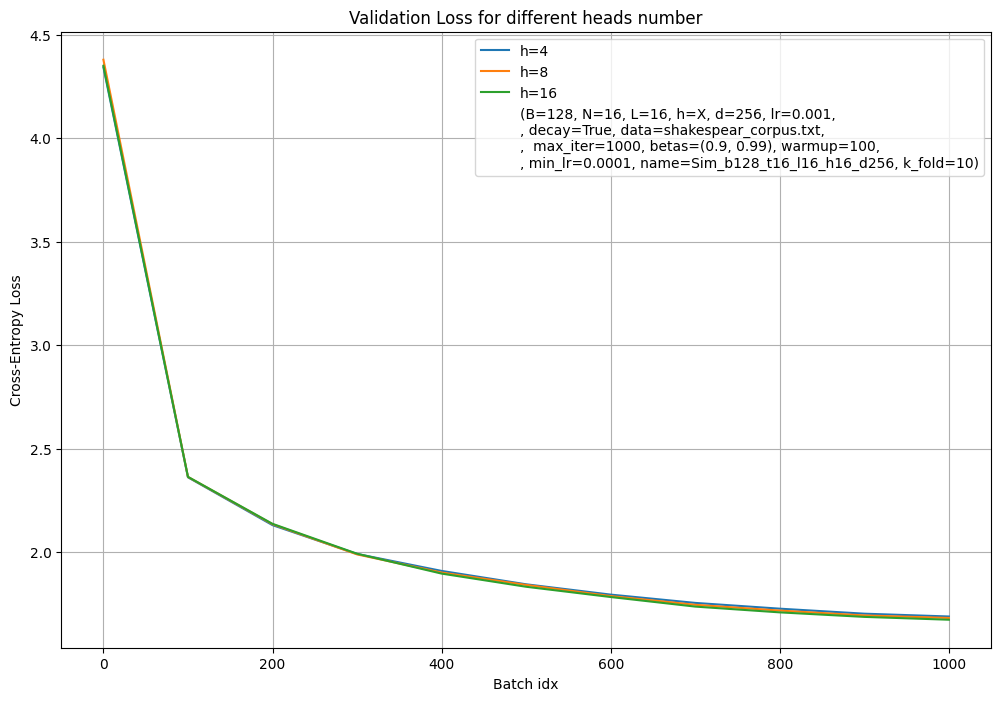

In [41]:
paths = ['./runs/results/Sim_b128_t16_l16_h4_d256',
         './runs/results/Sim_b128_t16_l16_h8_d256',
         './runs/results/Sim_b128_t16_l16_h16_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'
plt.scatter([], [], color="w", alpha=0, label=stringify_hyparams(args))

plt.legend(loc = 'upper right')

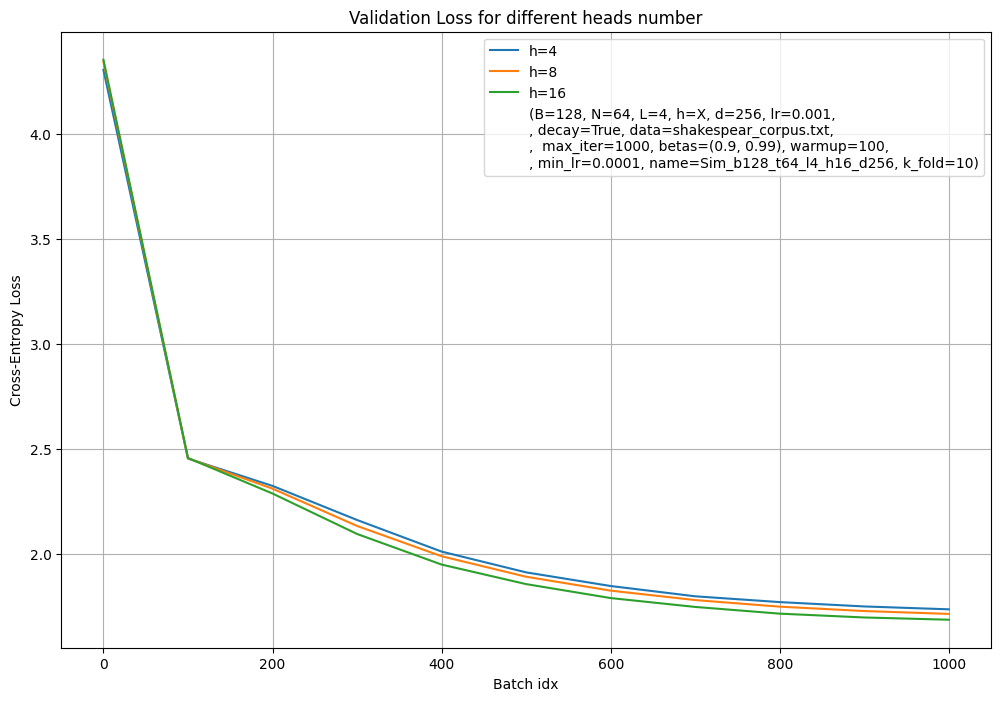

In [42]:
paths = ['./runs/results/Sim_b128_t64_l4_h4_d256',
         './runs/results/Sim_b128_t64_l4_h8_d256',
         './runs/results/Sim_b128_t64_l4_h16_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'
plt.scatter([], [], color="w", alpha=0, label=stringify_hyparams(args))

plt.legend(loc = 'upper right')

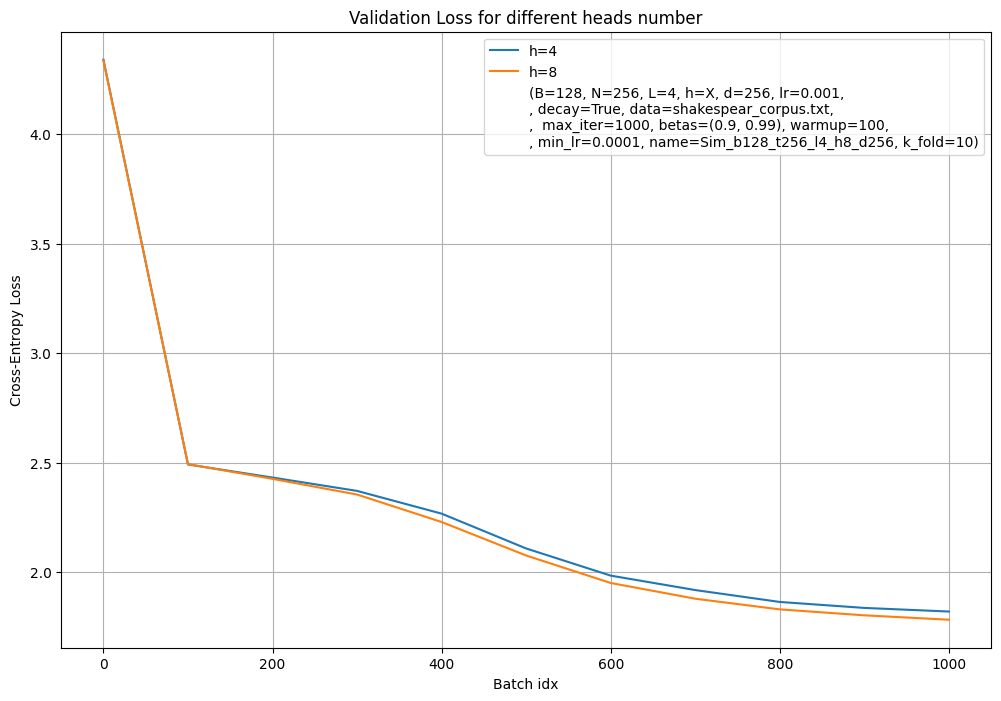

In [44]:
paths = ['./runs/results/Sim_b128_t256_l4_h4_d256',
         './runs/results/Sim_b128_t256_l4_h8_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'
plt.scatter([], [], color="w", alpha=0, label=stringify_hyparams(args))

plt.legend(loc = 'upper right')

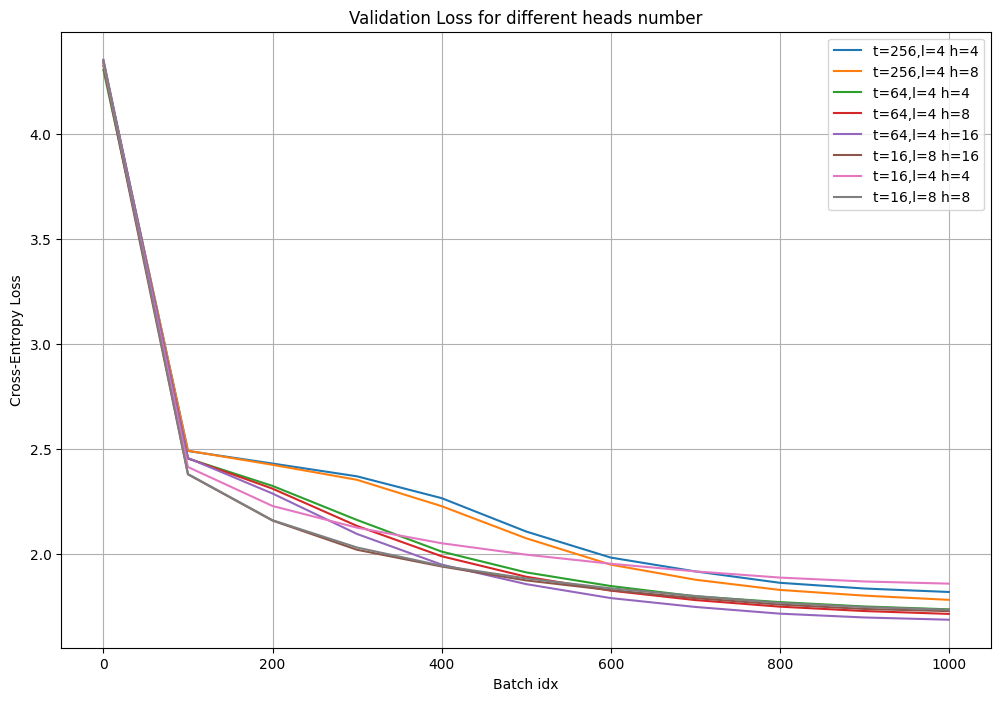

In [60]:
paths = ['./runs/results/Sim_b128_t256_l4_h4_d256',
         './runs/results/Sim_b128_t256_l4_h8_d256',
         './runs/results/Sim_b128_t64_l4_h4_d256',
         './runs/results/Sim_b128_t64_l4_h8_d256',
        './runs/results/Sim_b128_t64_l4_h16_d256',
        './runs/results/Sim_b128_t16_l8_h16_d256',
         './runs/results/Sim_b128_t16_l4_h4_d256',
         './runs/results/Sim_b128_t16_l8_h8_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"t={cross_val_run['params']['n_tokens']},l={cross_val_run['params']['n_layers']} h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'

plt.legend(loc = 'upper right')

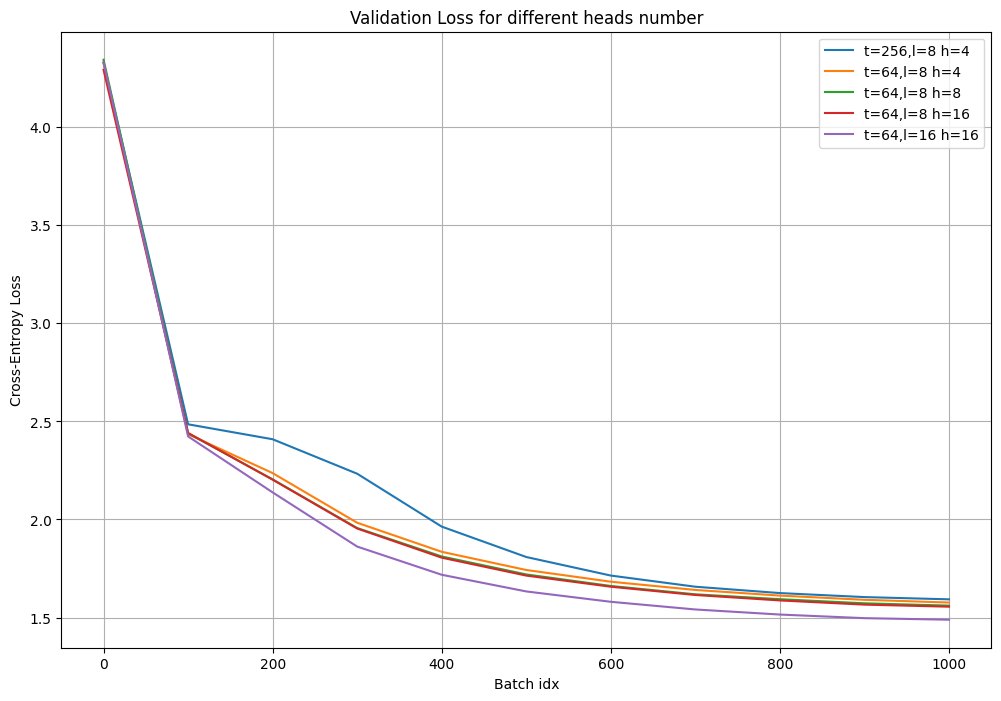

In [72]:
paths = [
        './runs/results/Sim_b128_t256_l8_h4_d256',

        './runs/results/Sim_b128_t64_l8_h16_d256',
        './runs/results/Sim_b128_t64_l16_h16_d256']


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"t={cross_val_run['params']['n_tokens']},l={cross_val_run['params']['n_layers']} h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'

plt.legend(loc = 'upper right')

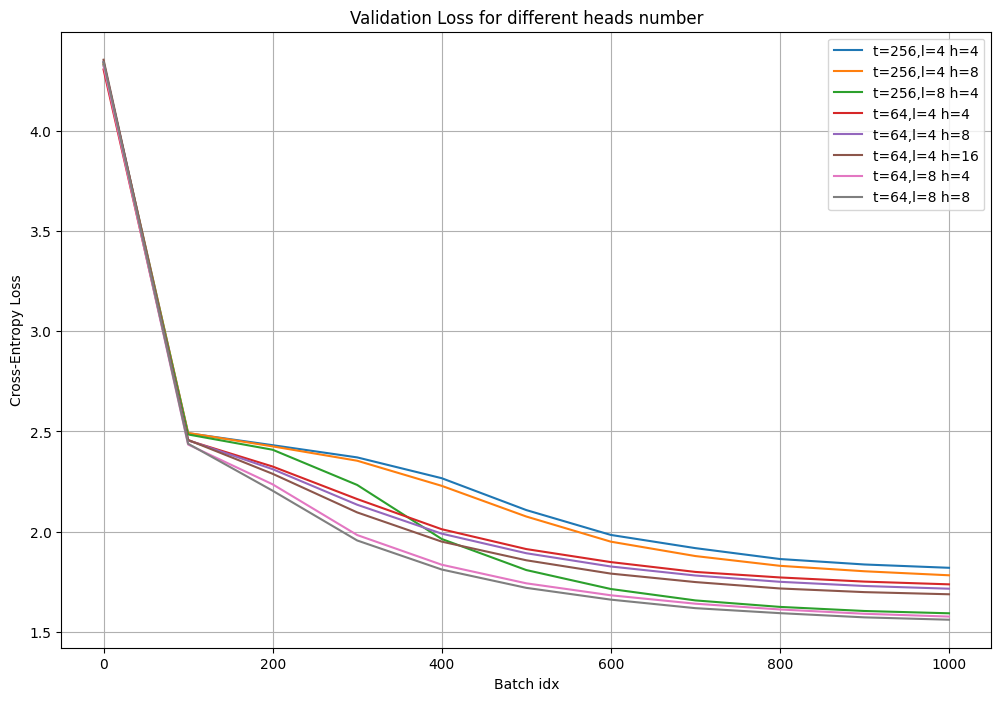

In [57]:
paths = ['./runs/results/Sim_b128_t256_l4_h4_d256',
         './runs/results/Sim_b128_t256_l4_h8_d256',
        './runs/results/Sim_b128_t256_l8_h4_d256',

         './runs/results/Sim_b128_t64_l4_h4_d256',
         './runs/results/Sim_b128_t64_l4_h8_d256',
        './runs/results/Sim_b128_t64_l4_h16_d256',
         './runs/results/Sim_b128_t64_l8_h4_d256',
         './runs/results/Sim_b128_t64_l8_h8_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"t={cross_val_run['params']['n_tokens']},l={cross_val_run['params']['n_layers']} h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'

plt.legend(loc = 'upper right')

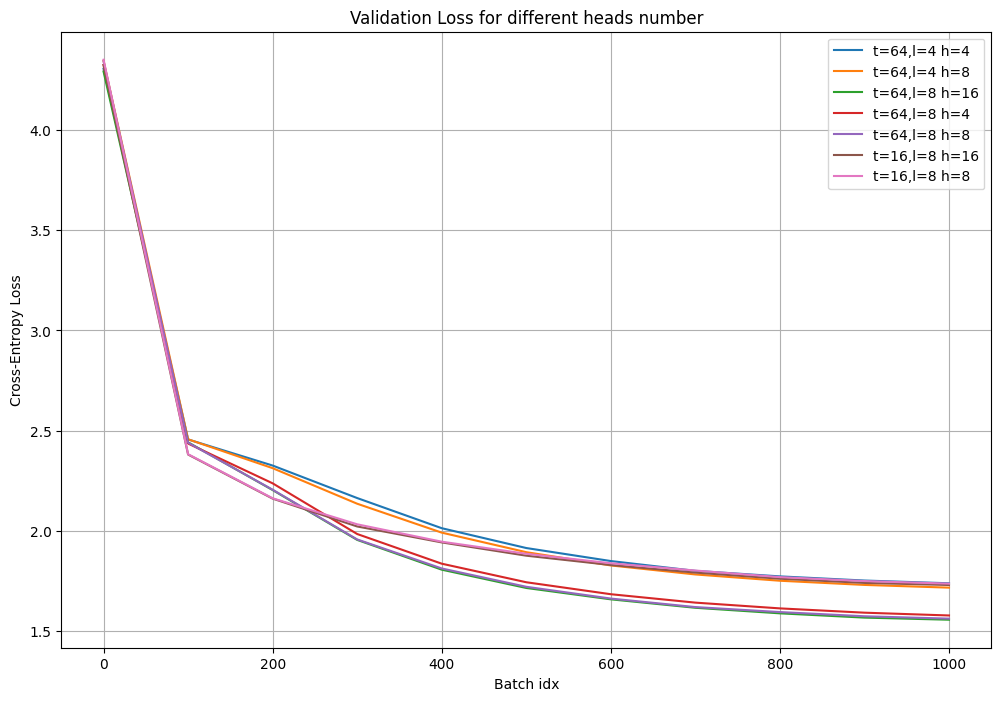

In [65]:
paths = [
         './runs/results/Sim_b128_t64_l4_h4_d256',
         './runs/results/Sim_b128_t64_l4_h8_d256',
        './runs/results/Sim_b128_t64_l8_h16_d256',
                './runs/results/Sim_b128_t64_l8_h4_d256',
        './runs/results/Sim_b128_t64_l8_h8_d256',

        './runs/results/Sim_b128_t16_l8_h16_d256',
         './runs/results/Sim_b128_t16_l8_h8_d256',]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"t={cross_val_run['params']['n_tokens']},l={cross_val_run['params']['n_layers']} h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'

plt.legend(loc = 'upper right')

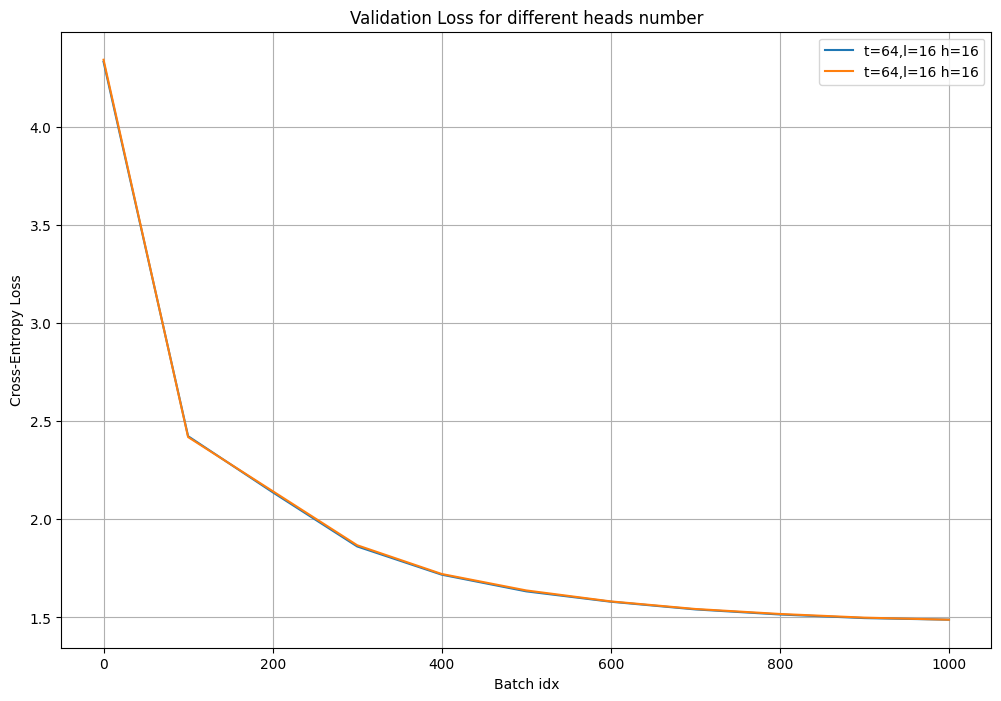

In [77]:
paths = [
        './runs/results/Sim_b128_t64_l16_h16_d256',
        './runs/results/no_decay_b128_t64_l16_h16_d256/',
    ]


plt.figure(figsize=(12, 8))
plt.grid(True)

for path in paths:
    cross_val_run = torch.load(f'{path}/total_cross_val_metrics.pt')   # load final recap file.
    val_loss = cross_val_run['k_fold_valid_loss'] 
    val_int = cross_val_run['params']['val_int']
    val_mean = val_loss.mean(dim=0)

    plt.plot(torch.arange(0, val_mean.size(0)) * val_int, val_mean, label=f"t={cross_val_run['params']['n_tokens']},l={cross_val_run['params']['n_layers']} h={cross_val_run['params']['n_heads']}")
plt.xlabel('Batch idx')
plt.ylabel('Cross-Entropy Loss')
plt.title('Validation Loss for different heads number')
args = cross_val_run['params']
args['n_heads'] = 'X'

plt.legend(loc = 'upper right')